In [3]:
%matplotlib inline
import pylab
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from scipy import integrate
matplotlib.rcParams.update({'font.size': 22})
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

**Задача 1**  
1. Выведите формулу для точного решения краевой задачи:
$$
\begin{align}
& u_{xx} = f(x) \\
& u_x(0) = d \\
& u(1) = b
\end{align}
$$
2. Придумайте конечно-разностный метод 2-го порядка аппроксимации для решения этой задачи, предложите несколько вариантов аппроксимации левого г.у. Выпишите матрицу линейной системы для значений в узлах.

**Задача 2**  
* Запрограммируйте численный метод из предыдущей задачи. 
* Постройте график зависимости ошибки от шага сетки в логарифмической шкале. Выясните, как изменится порядок сходимости, если использовать аппроксимацию 1-го порядка для левого г.у.


**Задача 3**  
1. Выведите условия на коэффициенты *явного* метода РК c 2-мя стадиями, обеспечивающие 2-й порядок аппроксимации. 
2. Опишите 1-параметрическое семейство *явных* 2-х стадийных методов 2-го порядка аппроксимации

**Задача 4**  
1. Запрограммируйте явный 2-х стадийный метод РК 2-го порядка для решения задачи Коши для ОДУ $u_t = f(t,u)$
2. Придумайте задачу с точным аналитическим решением, протестируйте метод на этой задаче.

## Нелинейный маятник
$\theta''(t) + b \theta'(t) + c \sin(\theta(t)) = 0$

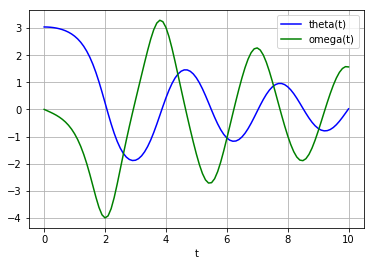

In [4]:
from scipy.integrate import odeint
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

b = 0.25
c = 5.0

y0 = [np.pi - 0.1, 0.0]
t = np.linspace(0, 10, 101)
sol = odeint(pend, y0, t, args=(b, c))
import matplotlib.pyplot as plt
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()

**Задача 5**  
Запишем уравнения движения брошенного тела  в проекциях на оси $x$, $y$ вместе с определением скорости:
$$
\begin{align}
\label{eq:ode_traj}
& \frac{dx}{dt} = v_x \\
& \frac{dy}{dt} = v_y \\
& \frac{dv_x}{dt} = -\frac{F_{d}}{m} \cos{\alpha} \\
& \frac{dv_y}{dt} = -g - \frac{F_{d}}{m} \sin{\alpha}
\end{align}
$$
$m$ - масса тела, $v_x, v_y$ - компоненты скорости, $\alpha$ - угол наклона траектории к горизонту, $\sin{\alpha} = \frac{v_y}{\sqrt{v_x^2 + v_y^2}}$,  $\cos{\alpha} = \frac{v_x}{\sqrt{v_x^2 + v_y^2}}$, $F_d$ - сила сопротивления (drug) воздуха, действующая на тело.
Начальные условия -- скорость в нижней точке траектории ($y = 0, x = 0$.):
$$
\begin{align}
\label{eq:ic_traj}
& x(t=0) = 0 \\
& y(t=0) = 0 \\
& v_x (t=0) = v_x^0 \\
& v_y (t=0) = v_y^0
\end{align}
$$
Необходимо  решить задачу Коши с ненулевой силой $F_d$ численно. Расчёт до момента времени $T$, когда тело упадёт на землю $y(T) = 0$.
Закон Стокса:$F_d = -6 \pi r \mu v$,
$r$ - радиус сферического объекта, $\mu$ - динамическая вязкость среды (для воздуха $\mu = 1.74 \times 10^{-5}$ Па$\cdot$с)